In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path=Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True,exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv("datasets/housing/housing.csv")  

housing = load_housing_data()             

/tmp/ipykernel_466/3322159103.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


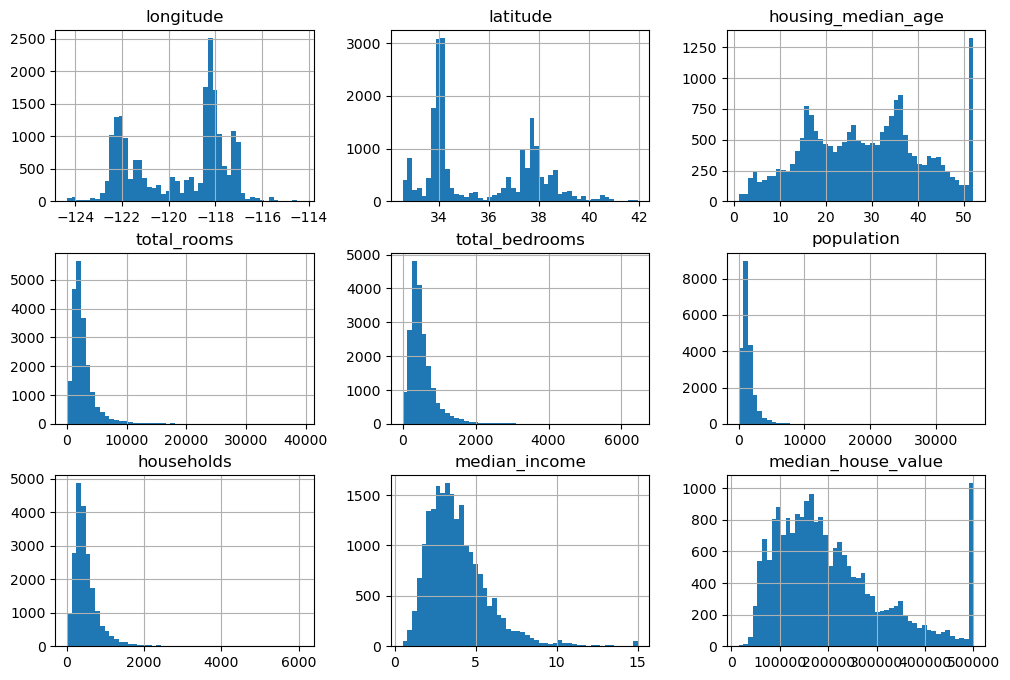

In [6]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,8))
plt.show()

In [7]:
import numpy as np


def shuffle_and_split_data(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [8]:
train,test=shuffle_and_split_data(housing,0.2)

In [9]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


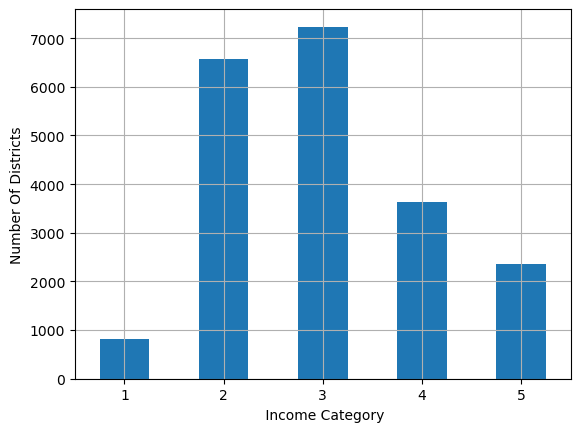

In [11]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel(" Income Category")
plt.ylabel("Number Of Districts")
plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2,
random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_set_n=housing.iloc[train_index]
    strat_test_set_n=housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])
    

In [14]:
strat_splits

[[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  13096    -122.42     37.80                52.0       3321.0          1115.0   
  14973    -118.38     34.14                40.0       1965.0           354.0   
  3785     -121.98     38.36                33.0       1083.0           217.0   
  14689    -117.11     33.75                17.0       4174.0           851.0   
  20507    -118.15     33.77                36.0       4366.0          1211.0   
  ...          ...       ...                 ...          ...             ...   
  14207    -118.40     33.86                41.0       2237.0           597.0   
  13105    -119.31     36.32                23.0       2945.0           592.0   
  19301    -117.06     32.59                13.0       3920.0           775.0   
  19121    -118.40     34.06                37.0       3781.0           873.0   
  19888    -122.41     37.66                44.0        431.0           195.0   
  
         population  hous

In [15]:
from sklearn.model_selection import train_test_split
strat_train_set1,strat_test_set1=train_test_split(housing,test_size=0.2,stratify=housing["income_cat"],random_state=42)

In [16]:
strat_test_set1["income_cat"].value_counts()/len(strat_test_set1)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [17]:
housing["income_cat"].value_counts()/len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [18]:
for set_ in (strat_train_set1, strat_test_set1):
    set_.drop("income_cat", axis=1, inplace=True)

In [19]:
housing=strat_train_set1.copy()

In [20]:
from fileinput import filename


housing.to_csv("housing_eda.csv",index=False)

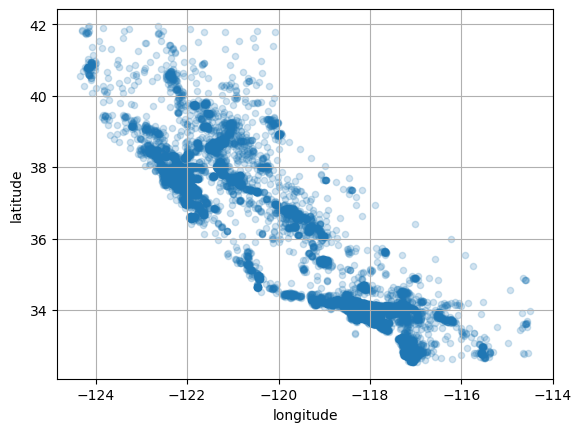

In [21]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
plt.show()

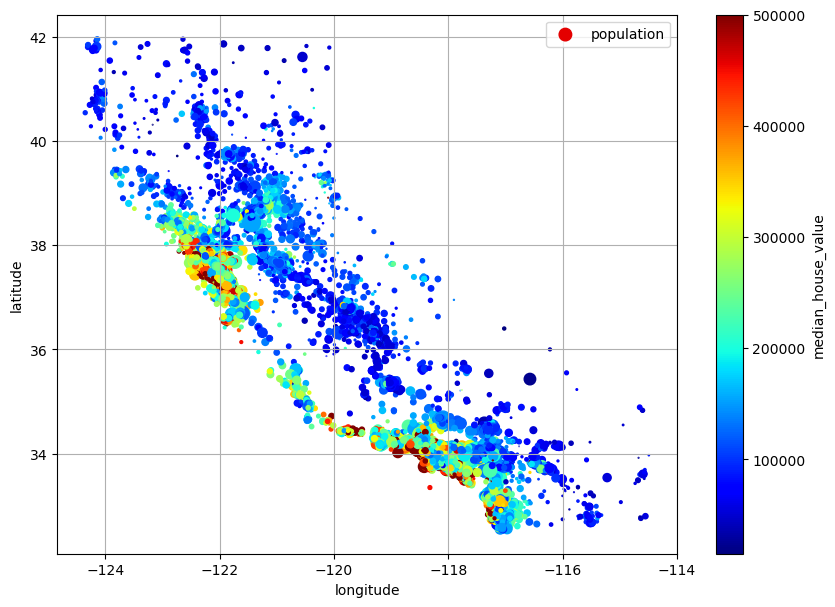

In [22]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,s=housing["population"]/100,label="population",
c="median_house_value",cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7))
plt.show()

In [23]:
housing.drop("ocean_proximity",axis=1,inplace=True)

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0


In [25]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

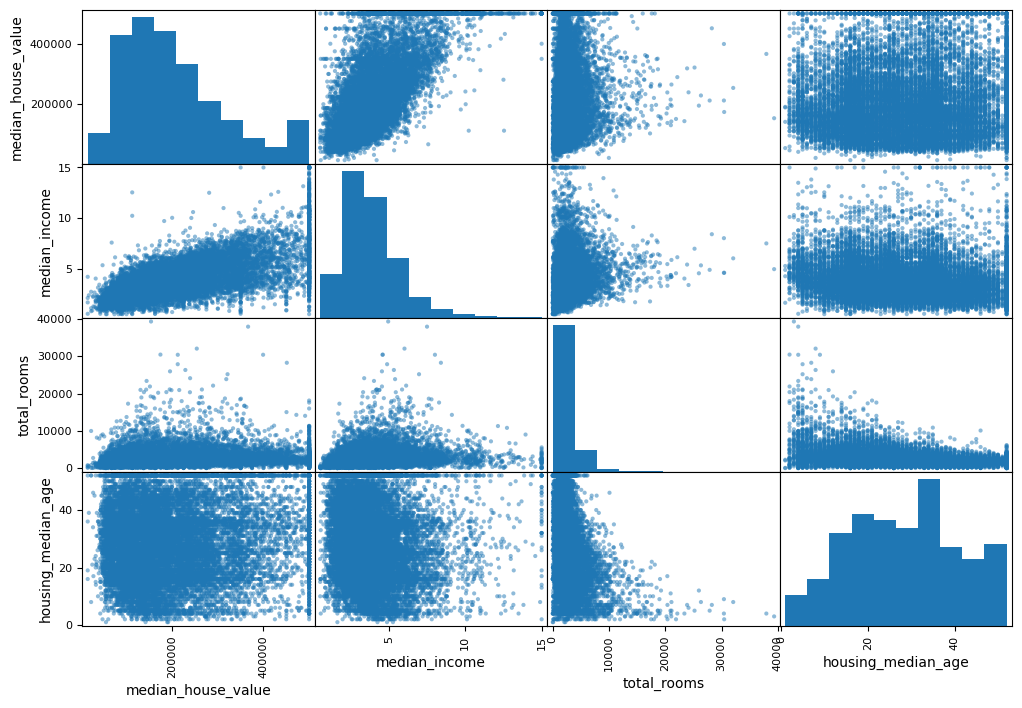

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income",
"total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

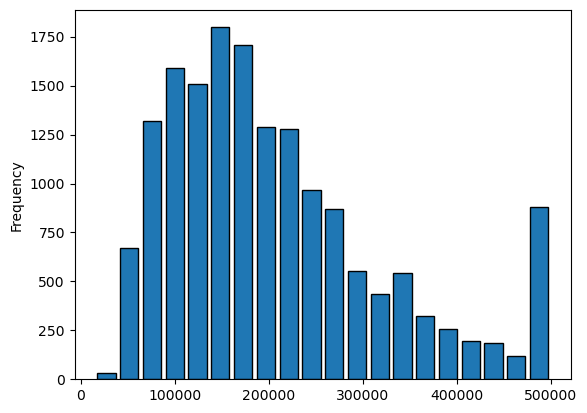

In [27]:
housing["median_house_value"].plot(kind="hist",bins=20,rwidth=0.8,edgecolor="black")
plt.show()

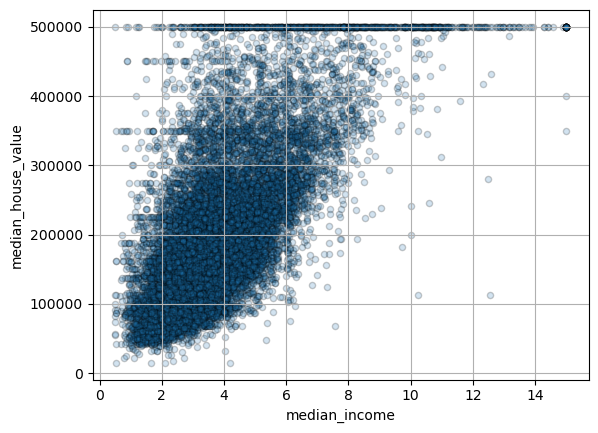

In [28]:
housing.plot(kind="scatter", x="median_income",
y="median_house_value", grid=True,edgecolor="black",alpha=0.2)
plt.show()

In [29]:
housing["rooms_per_house"] = housing["total_rooms"] /housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] /housing["total_rooms"]
housing["people_per_house"] = housing["population"] /housing["households"]

In [30]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [31]:
housing = strat_train_set1.drop("median_house_value", axis=1)
housing_labels = strat_train_set1["median_house_value"].copy()

In [32]:
#imputing missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [33]:
housing_num=housing.select_dtypes(include=[np.number])

In [34]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [35]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [36]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [37]:
X=imputer.transform(housing_num)

In [38]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [39]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [40]:
housing_cat=housing[["ocean_proximity"]]

In [41]:
housing_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [44]:
from sklearn.preprocessing import OneHotEncoder
one_h=OneHotEncoder()
housing_cat_onehot=one_h.fit_transform(housing_cat)

In [45]:
housing_cat_onehot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [46]:
one_h.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
from sklearn.preprocessing import MinMaxScaler
min_max1=MinMaxScaler()


In [48]:
housing_num_min_max_scaled=min_max1.fit_transform(housing_num)

In [49]:
housing_num_min_max_scaled

array([[0.19574037, 0.55851064, 1.        , ..., 0.09649123, 0.19283181,
        0.11026055],
       [0.60547667, 0.16914894, 0.76470588, ..., 0.04066986, 0.06645511,
        0.38535331],
       [0.24036511, 0.61808511, 0.62745098, ..., 0.03429027, 0.03770767,
        0.1333154 ],
       ...,
       [0.73935091, 0.00425532, 0.23529412, ..., 0.17243283, 0.14168378,
        0.24563109],
       [0.60344828, 0.1606383 , 0.70588235, ..., 0.10563121, 0.15624417,
        0.25141722],
       [0.19675456, 0.54361702, 0.84313725, ..., 0.04165133, 0.03938772,
        0.19195597]], shape=(16512, 8))

In [50]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]],
[[35]], gamma=0.1)

In [51]:
aa=pd.DataFrame(age_simil_35).value_counts().sort_index()

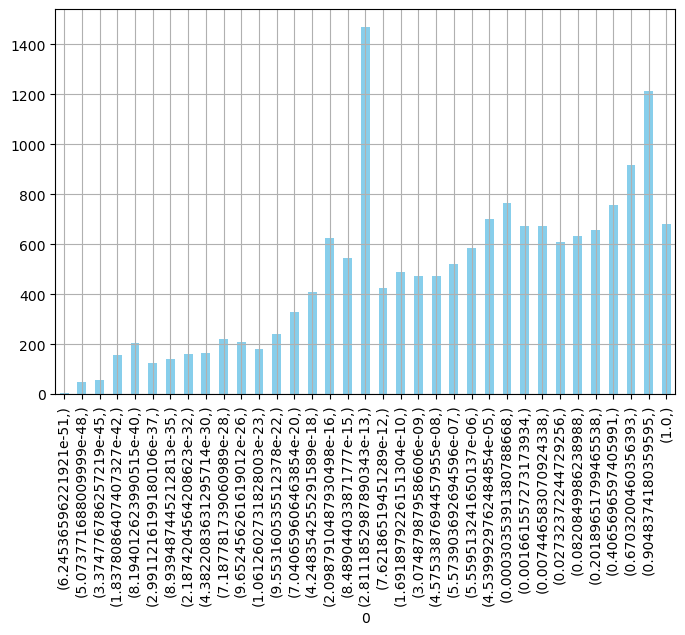

In [52]:
aa.plot(kind="bar", rot=90, color="skyblue", grid=True, figsize=(8,5))
plt.show()

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
StandardScaler())

In [54]:
housing_num_prepared=num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [55]:

df_housing_num_prepared=pd.DataFrame(housing_num_prepared,columns=num_pipeline.get_feature_names_out(),index=housing_num.index)

In [56]:
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [57]:
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age",
"total_rooms",
"total_bedrooms", "population", "households",
"median_income"]
cat_attribs = ["ocean_proximity"]
cat_pipeline = make_pipeline(
SimpleImputer(strategy="most_frequent"),
OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs),
])

In [58]:
from sklearn.compose import make_column_selector,make_column_transformer
preprocessing = make_column_transformer(
(num_pipeline,
make_column_selector(dtype_include=np.number)),
(cat_pipeline, make_column_selector(dtype_include=object)),
)

In [59]:
housing_prepared=preprocessing.fit_transform(housing)

In [60]:
df_housing_prepared=pd.DataFrame(housing_prepared,columns=preprocessing.get_feature_names_out())

In [61]:
df_housing_prepared

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [62]:
# ===============================
# 📦 1. Import کتابخانه‌ها
# ===============================
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

# ===============================
# 🧠 2. تعریف کلاس ClusterSimilarity
# ===============================
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    """
    این کلاس مختص محاسبه‌ی ویژگی‌های شباهت جغرافیایی است.
    با استفاده از KMeans نقاط را خوشه‌بندی می‌کند و سپس
    شباهت هر نمونه را با مراکز خوشه‌ها با تابع RBF محاسبه می‌کند.
    """
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X)
        self.cluster_centers_ = self.kmeans_.cluster_centers_
        return self

    def transform(self, X):
        similarities = rbf_kernel(X, self.cluster_centers_, gamma=self.gamma)
        return similarities

    def get_feature_names_out(self, input_features=None):
        return [f"geo_cluster_{i}" for i in range(self.n_clusters)]


# ===============================
# 🧮 3. توابع و pipeline برای نسبت‌ها
# ===============================
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

# ===============================
# 🔢 4. pipeline لگاریتمی
# ===============================
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

# ===============================
# 🔧 5. pipeline عددی پیش‌فرض
# ===============================
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# ===============================
# 🏷️ 6. pipeline دسته‌ای (categorical)
# ===============================
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# ===============================
# 🧩 7. ترکیب همه در ColumnTransformer
# ===============================
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)

preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline  # ستون باقی‌مانده مثل housing_median_age
)

# ===============================
# 🚀 8. استفاده از pipeline
# ===============================
# فرض کن df نام DataFrame اصلی‌ات است (مثل housing)
# housing_prepared = preprocessing.fit_transform(housing)

# برای دیدن نام همه‌ی ویژگی‌های نهایی:
# feature_names = preprocessing.get_feature_names_out()
# df_prepared = pd.DataFrame(housing_prepared, columns=feature_names, index=housing.index)


In [63]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)
housing_predictions=lin_reg.predict(housing)

In [65]:

from sklearn.metrics import root_mean_squared_error
lin_rmse=root_mean_squared_error(housing_labels,housing_predictions)
lin_rmse

68972.88910758533

In [66]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_labels)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [67]:
housing_predictions = tree_reg.predict(housing)
tree_rmse=root_mean_squared_error(housing_predictions,housing_labels)
tree_rmse

0.0

In [68]:
from sklearn.model_selection import cross_val_score
tree_rmses=-cross_val_score(tree_reg,housing,housing_labels,scoring="neg_root_mean_squared_error", cv=10)

In [69]:
pd.DataFrame(tree_rmses).describe()

,0
count,10.000000
mean,66573.734600
std,1103.402323
min,64607.896046
25%,66204.731788
50%,66388.272499
75%,66826.257468
max,68532.210664


In [70]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,
RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing,
housing_labels,
scoring="neg_root_mean_squared_error", cv=10)

In [71]:
pd.DataFrame(forest_rmses).describe()

,0
count,10.000000
mean,47038.092799
std,1021.491757
min,45495.976649
25%,46510.418013
50%,47118.719249
75%,47480.519175
max,49140.832210


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
{'preprocessing__geo__n_clusters': [5, 8, 10],
'random_forest__max_features': [4, 6, 8]},
{'preprocessing__geo__n_clusters': [10, 15],
'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'preprocessing__geo__n_clusters': [5, 8, ...], 'random_forest__max_features': [4, 6, ...]}, {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6, 8, ...]}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"


In [78]:
grid_search.best_params_


{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [81]:
grid_search.best_estimator_

,steps,"[('preprocessing', ...), ('random_forest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [80]:
grid_search.cv_results_

{'mean_fit_time': array([ 5.75073036,  7.08719412,  9.00219607,  5.44631457,  7.35876322,
        10.11812433,  5.20166341,  8.03635923,  9.84775035,  7.58281064,
         9.96474171, 11.85685134,  7.84192554, 10.62182037, 12.77833215]),
 'std_fit_time': array([0.61363034, 0.21682225, 0.12979579, 0.21399777, 0.25222101,
        0.4174801 , 0.11730849, 0.2916965 , 0.13842413, 0.15120202,
        0.11843929, 0.04385331, 0.06685187, 0.15410295, 0.24988392]),
 'mean_score_time': array([0.16728449, 0.14555216, 0.15197531, 0.16523647, 0.15682173,
        0.17470185, 0.14978862, 0.16599258, 0.1543316 , 0.14926394,
        0.15043751, 0.14716585, 0.14813177, 0.15167761, 0.1467514 ]),
 'std_score_time': array([0.01168907, 0.00440135, 0.01548697, 0.02750413, 0.00737159,
        0.03081946, 0.00641782, 0.02658231, 0.0069523 , 0.0007508 ,
        0.00619386, 0.00208096, 0.00088033, 0.00757962, 0.00306715]),
 'param_preprocessing__geo__n_clusters': masked_array(data=[5, 5, 5, 8, 8, 8, 10, 10, 10, 1

In [84]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False,
inplace=True)
[...]
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,7.841926,0.066852,0.148132,0.000880,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42725.423800,-43708.197434,-44334.935606,-43589.518946,662.417543,1
13,10.621820,0.154103,0.151678,0.007580,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43486.175916,-43819.842374,-44899.968680,-44068.662323,603.399271,2
6,5.201663,0.117308,0.149789,0.006418,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43797.854175,-44036.240246,-44960.694004,-44264.929475,501.513170,3
9,7.582811,0.151202,0.149264,0.000751,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4
7,8.036359,0.291696,0.165993,0.026582,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4


In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters':
randint(low=3, high=50),
'random_forest__max_features': randint(low=2,
high=20)}
rnd_search = RandomizedSearchCV(
full_pipeline, param_distributions=param_distribs, n_iter=10,
cv=3,
scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'preprocessing__geo__n_clusters': <scipy.stats....x7f42327abe00>, 'random_forest__max_features': <scipy.stats....x7f4230304cd0>}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [86]:
rnd_search.cv_results_

{'mean_fit_time': array([22.95157568, 12.91034595, 10.58983231, 16.123619  ,  6.62923169,
         5.99363836,  4.76054144, 18.69224056,  9.71678448,  2.91234414]),
 'std_fit_time': array([0.88038251, 0.5998682 , 0.08848623, 0.42226469, 0.0652293 ,
        0.03370818, 0.2490891 , 1.51440125, 0.11056772, 0.05866991]),
 'mean_score_time': array([0.17114266, 0.15389252, 0.16305288, 0.15139159, 0.14750552,
        0.15763338, 0.18168147, 0.18703175, 0.15783493, 0.1367863 ]),
 'std_score_time': array([0.01608257, 0.00155422, 0.02286334, 0.00254357, 0.00145255,
        0.00573292, 0.02133554, 0.02570426, 0.00034859, 0.00090577]),
 'param_preprocessing__geo__n_clusters': masked_array(data=[41, 45, 23, 21, 13, 42, 24, 26, 32, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_random_forest__max_features': masked_array(data=[16, 9, 8, 12, 5, 4, 3, 13, 7, 2],
              mask=[False, False, Fals